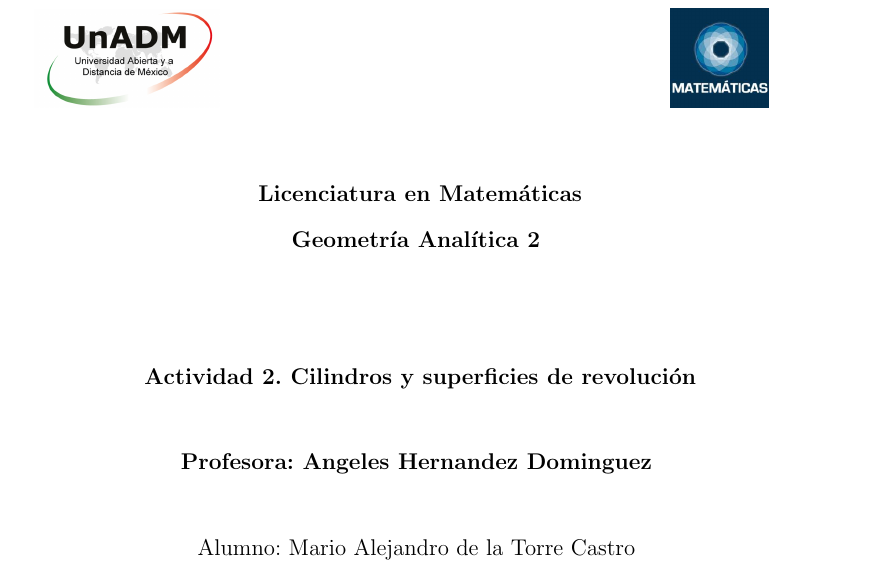

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib nbagg
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
import matplotlib.animation as animation
plt.style.use('ggplot')

In [34]:
help(plot_cuadric)

Help on function plot_cuadric in module __main__:

plot_cuadric(x_amp, y_amp, z_amp, x_dis, y_dis, z_dis, rads, extend, z_linear=False)
    A(x-xd)^2+B(y-yd)^2+C(z-zd)^2=D
    
    The var_dis refers to the xd,yd,zd, var in[x,y,z]
    
    The var_amp referes to the coefficients A,B,C, rads refer to D;
    
    This function automatically bound the axys for the biggest range, but for no ellipsoid figure
    we can adjust the axis manually with extend, extende must be an positive number.
    
    The z_linear is an optional parameter, z_linear=True reffers to A(x-xd)^2+B(y-yd)^2+C(z-zd)=D



In [55]:
def plot_cuadric(x_amp,y_amp,z_amp, x_dis,y_dis,z_dis, rads, extend, z_linear=False):
    """ A(x-xd)^2+B(y-yd)^2+C(z-zd)^2=D
    
    The var_dis refers to the xd,yd,zd, var in[x,y,z];
    
    The var_amp referes to the coefficients A,B,C, rads refer to D;
    
    This function automatically bound the axys for the biggest range, but for no ellipsoid figure
    we can adjust the axis manually with extend, extende must be an positive number.
    
    The z_linear is an optional parameter, z_linear=True reffers to A(x-xd)^2+B(y-yd)^2+C(z-zd)=D"""
    fig = plt.figure(figsize=(7,7)) # set fig with its size 10 x 10 inch
    ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D
    box=max((extend/2),
            (((extend+1)/2)*rads**0.5/(min(abs(x_amp),abs(y_amp),abs(z_amp))**0.5)
            +max(abs(x_dis),abs(y_dis),abs(z_dis))) ) # set draw area as box^3
    
    ax.set_xlim(-box,box) # set x-range
    ax.set_ylim(-box,box) # set y-range
    ax.set_zlim(-box,box) # set z-range

    # Create the mesh in polar coordinates and compute corresponding Z.
    r = np.linspace(0,max(extend/2, 
                          (extend*rads**0.5+0.1+abs(x_dis)
                           +abs(y_dis)
                           +abs(z_dis))/(min(abs(x_amp),abs(y_amp),abs(z_amp))**0.5))
                          
                    , 2048)
    p = np.linspace(0,2*np.pi, 2560)
    R, P = np.meshgrid(r, p)
    # Express the mesh in the cartesian system.
    X, Y = R*(np.cos(P)), R*(np.sin(P))
    
    # Plot the surface.
    if z_linear==True:
        Z = (rads/z_amp)-(x_amp/z_amp)*(X-x_dis)**2-(y_amp/z_amp)*(Y-y_dis)**2
        surf=ax.plot_surface(X, Y, Z+z_dis,  cmap=plt.cm.PRGn,linewidth=0, antialiased=False, alpha=0.5)
    else:
        Z = (( (rads/z_amp)-(x_amp/z_amp)*(X-x_dis)**2-(y_amp/z_amp)*(Y-y_dis)**2)**0.5)
        surf=ax.plot_surface(X, Y, Z+z_dis,  cmap=plt.cm.coolwarm,linewidth=0, antialiased=False, alpha=0.5)
        surf=ax.plot_surface(X, Y, -Z+z_dis, cmap=plt.cm.PRGn,linewidth=0, antialiased=False,  alpha=0.35)

    # Tweak the limits and add latex math labels.
    ax.set_xlabel(r"x",fontsize=20) # set x-label
    ax.set_ylabel(r"y",fontsize=20) # set y-label
    ax.set_zlabel(r"z",fontsize=20) # set z-label
    ax.set_xlim(-box,box) # set x-range
    ax.set_ylim(-box,box) # set y-range
    ax.set_zlim(-box,box) # set z-range

    plt.show()

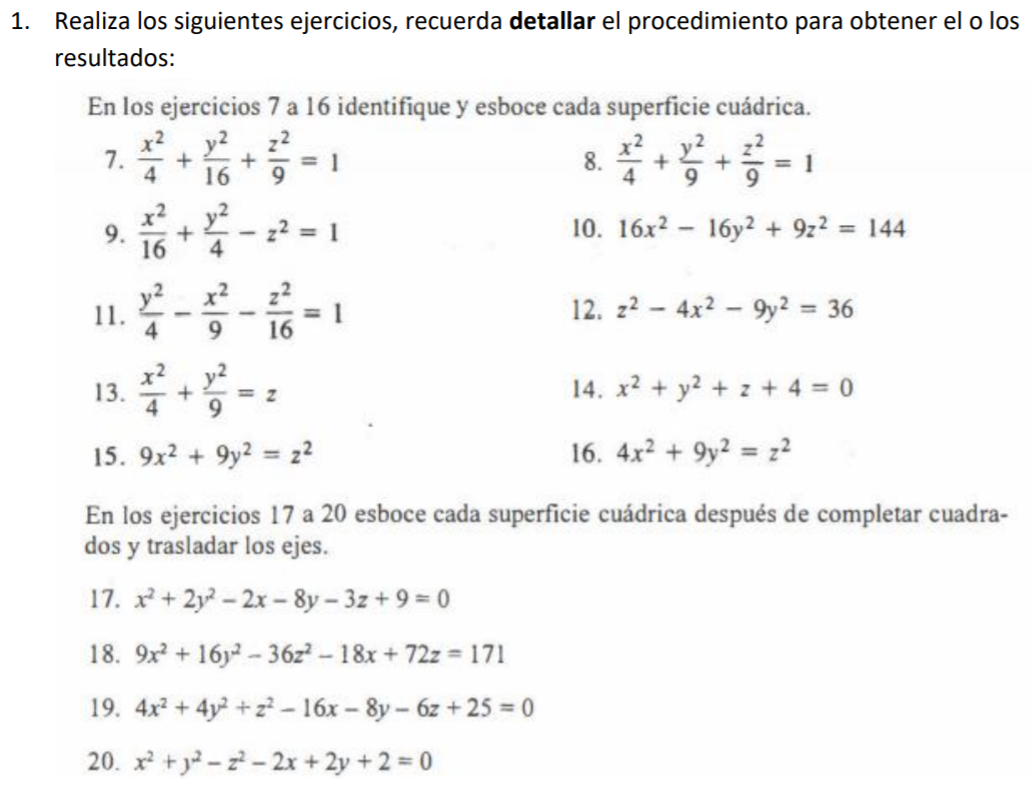

### 7.- $\dfrac{x^2}{4}+\dfrac{y^2}{16}+\dfrac{z^2}{9}=1$

<IPython.core.display.Javascript object>


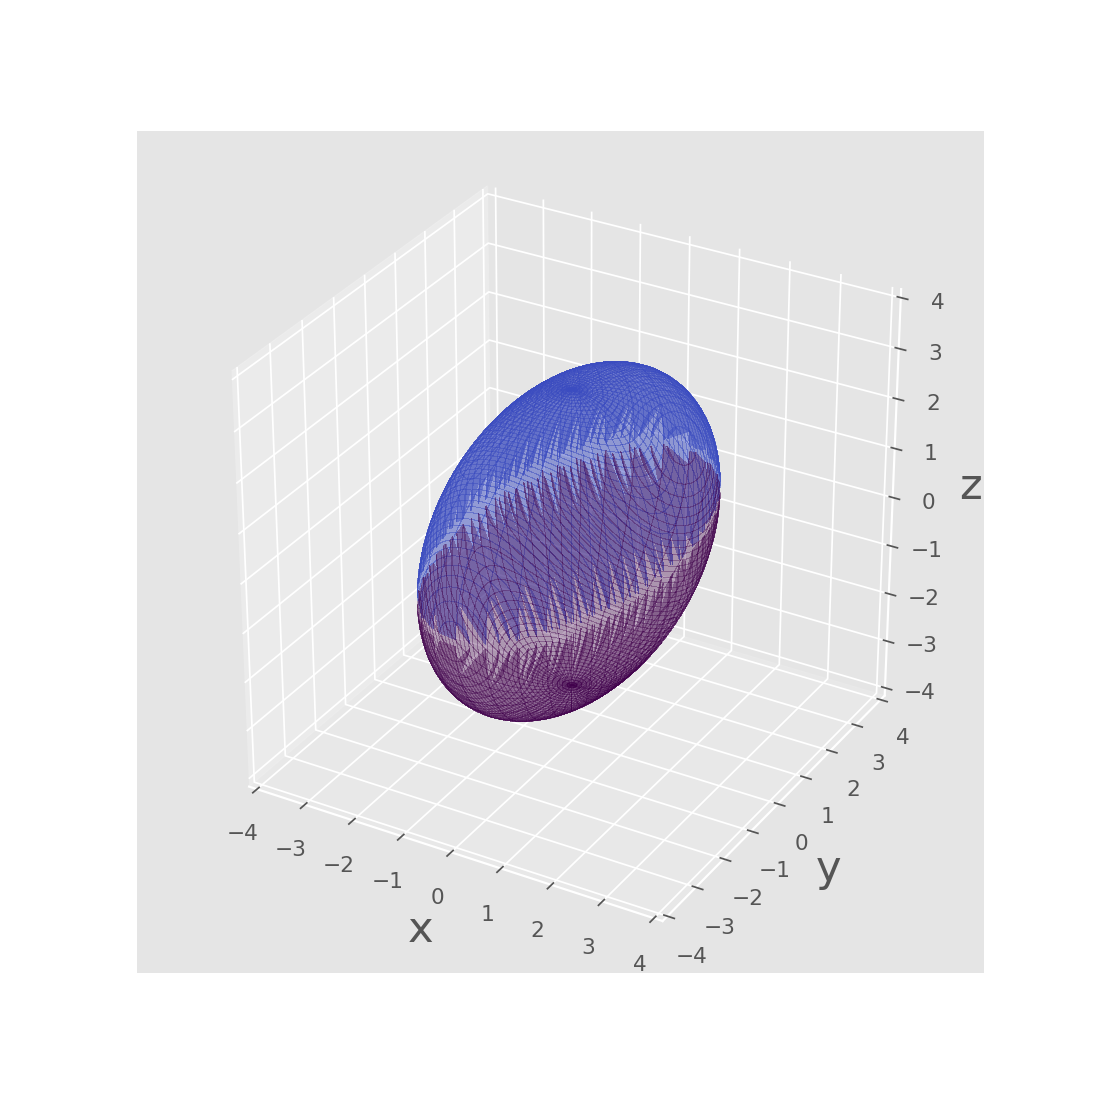

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [65]:
    # Set of the square amplitude of x,y,z
x_amp=1/4
y_amp=1/16
z_amp=1/9
    # Setting of displacement of the axys
x_dis=0
y_dis=0
z_dis=0
   # square of constant radius
rads=1

plot_cuadric(x_amp,y_amp,z_amp, x_dis,y_dis,z_dis, rads, 1,  z_linear=False)

### 8.- $\dfrac{x^2}{4}+\dfrac{y^2}{9}+\dfrac{z^2}{9}=1$

<IPython.core.display.Javascript object>


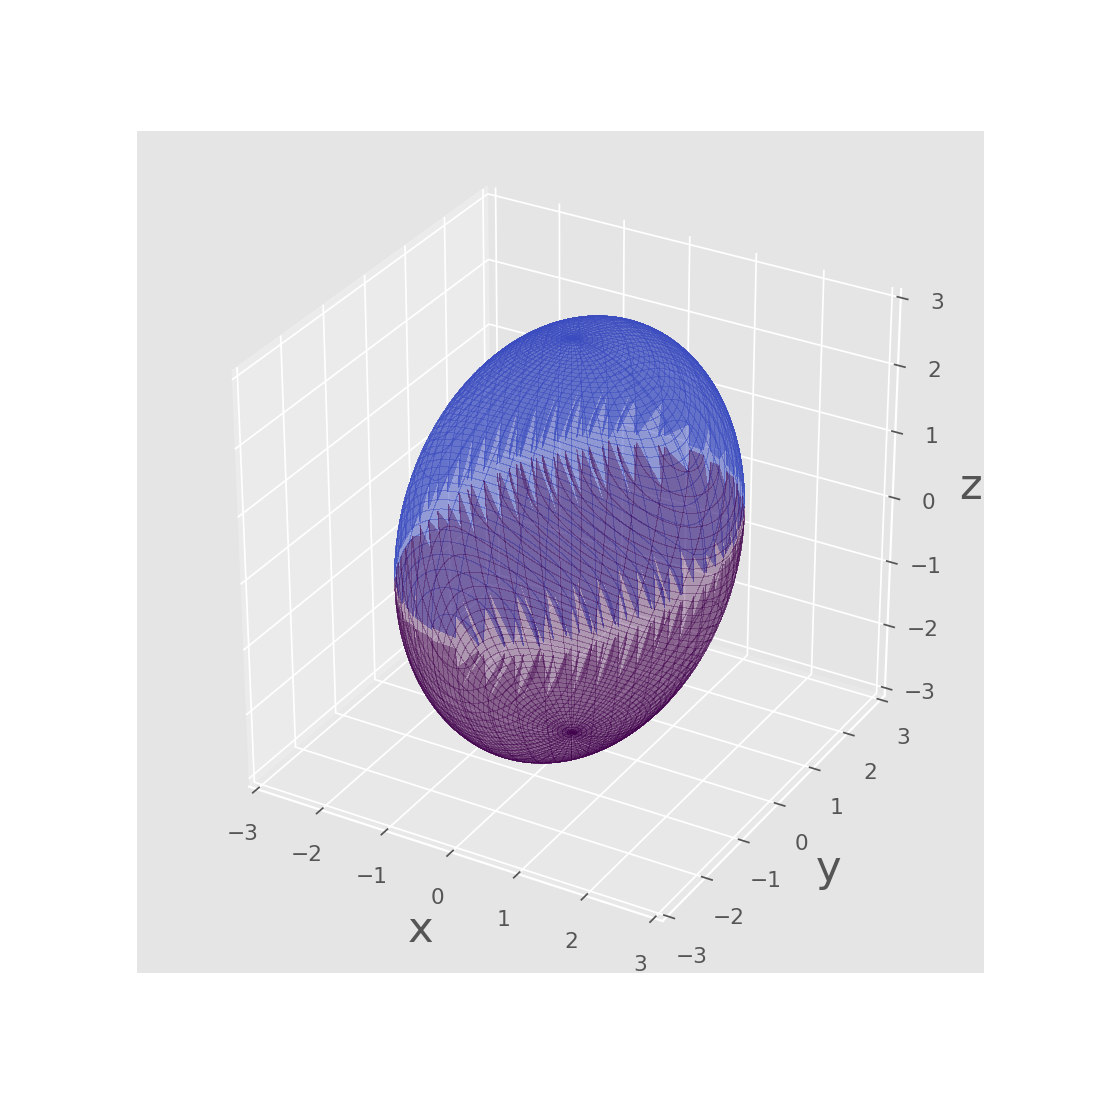

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [66]:
plot_cuadric(1/4,1/9,1/9, 0,0,0, 1,1)

### 9.- $\dfrac{x^2}{16}+\dfrac{y^2}{4}-z^2=1$

<IPython.core.display.Javascript object>


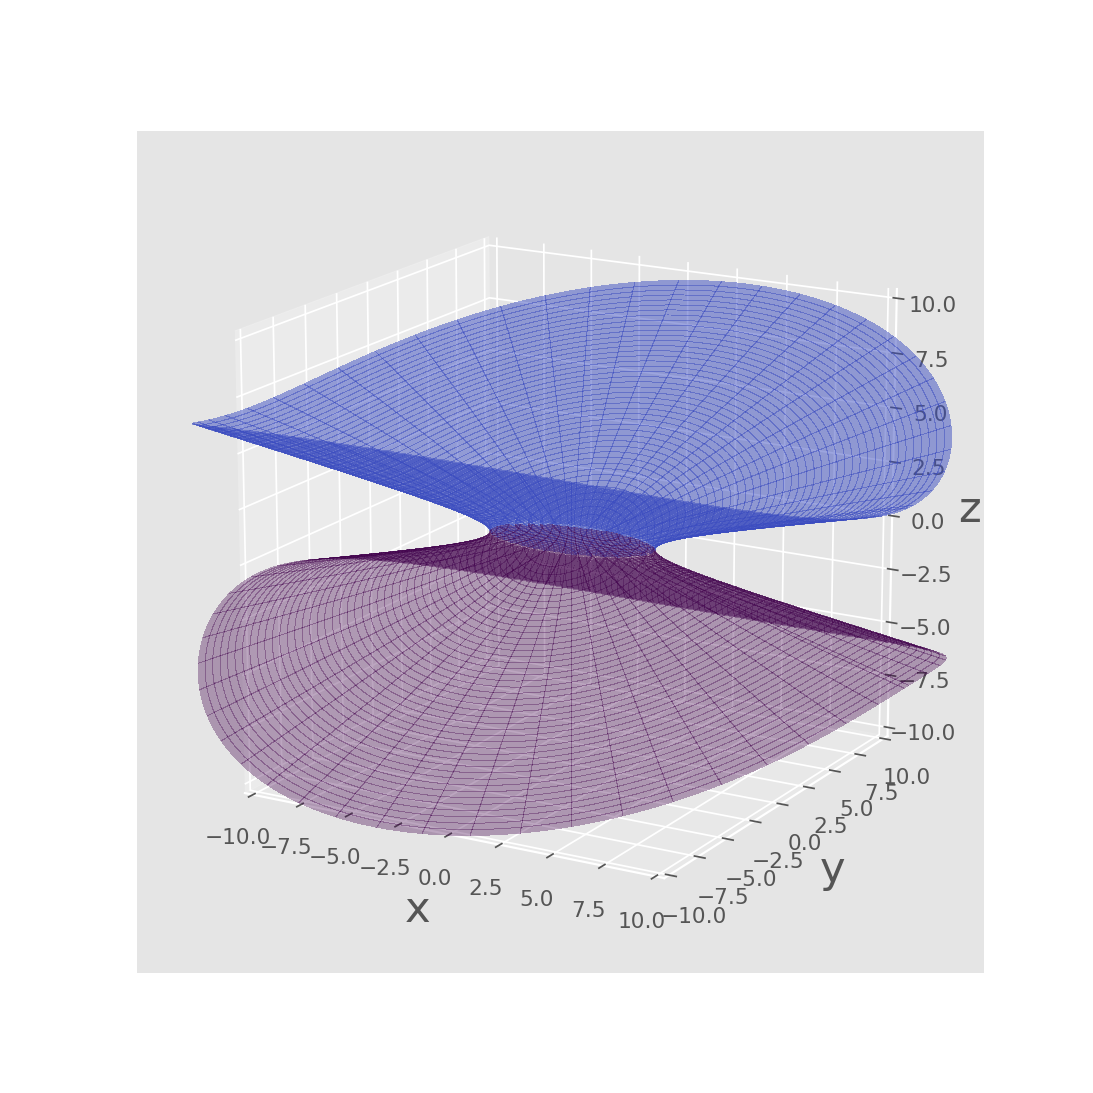

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [64]:
plot_cuadric(1/16,1/4,-1, 0,0,0, 1,4)

### 10.- $16x^2-16y^2+9z^2=144$

<IPython.core.display.Javascript object>


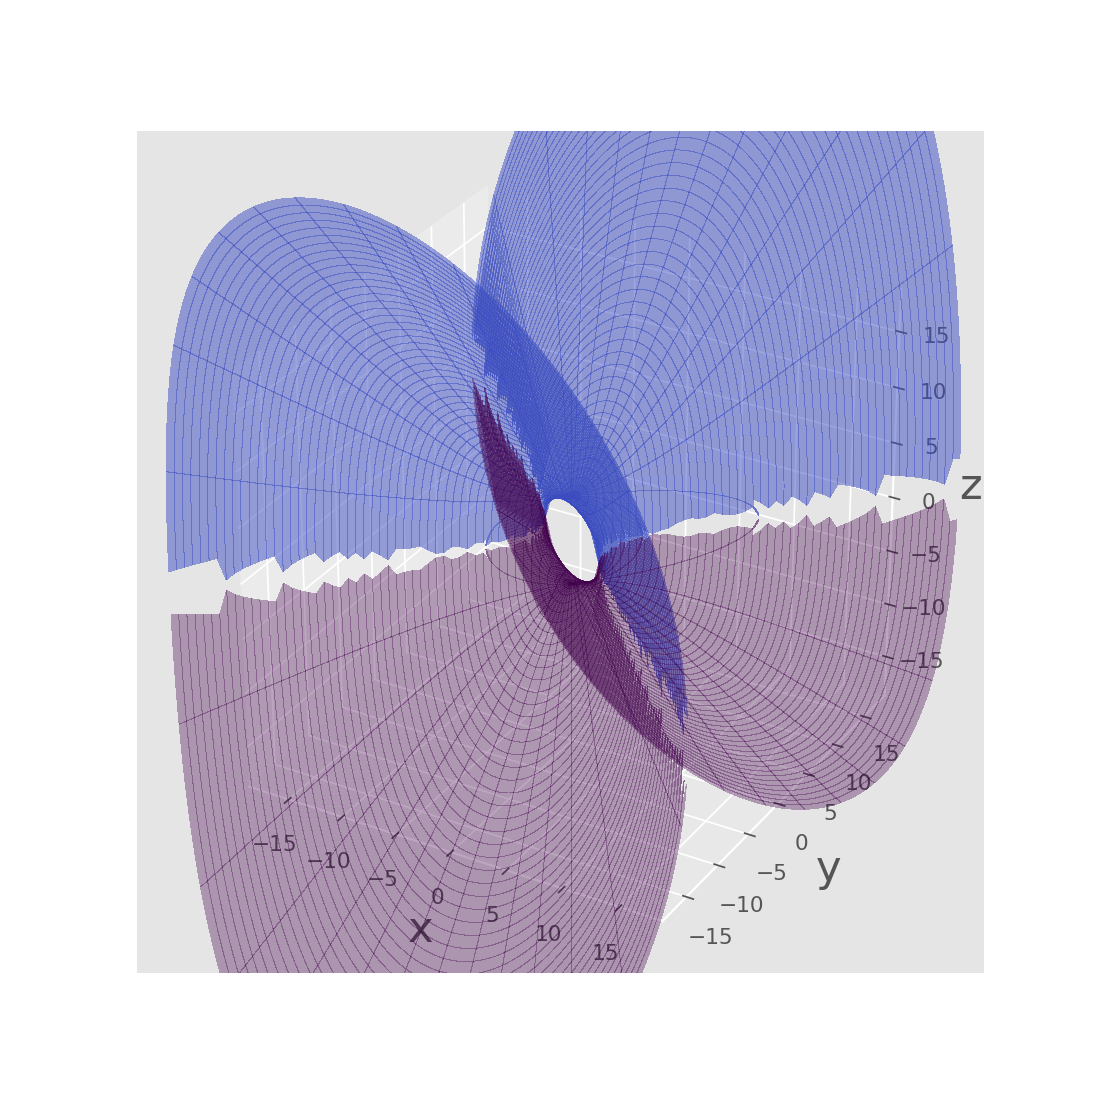

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [63]:
plot_cuadric(16,-16,9, 0,0,0, 144,8)

### 11.- $\dfrac{y^2}{4}-\dfrac{x^2}{9}-\dfrac{z^2}{16}=1$

<IPython.core.display.Javascript object>


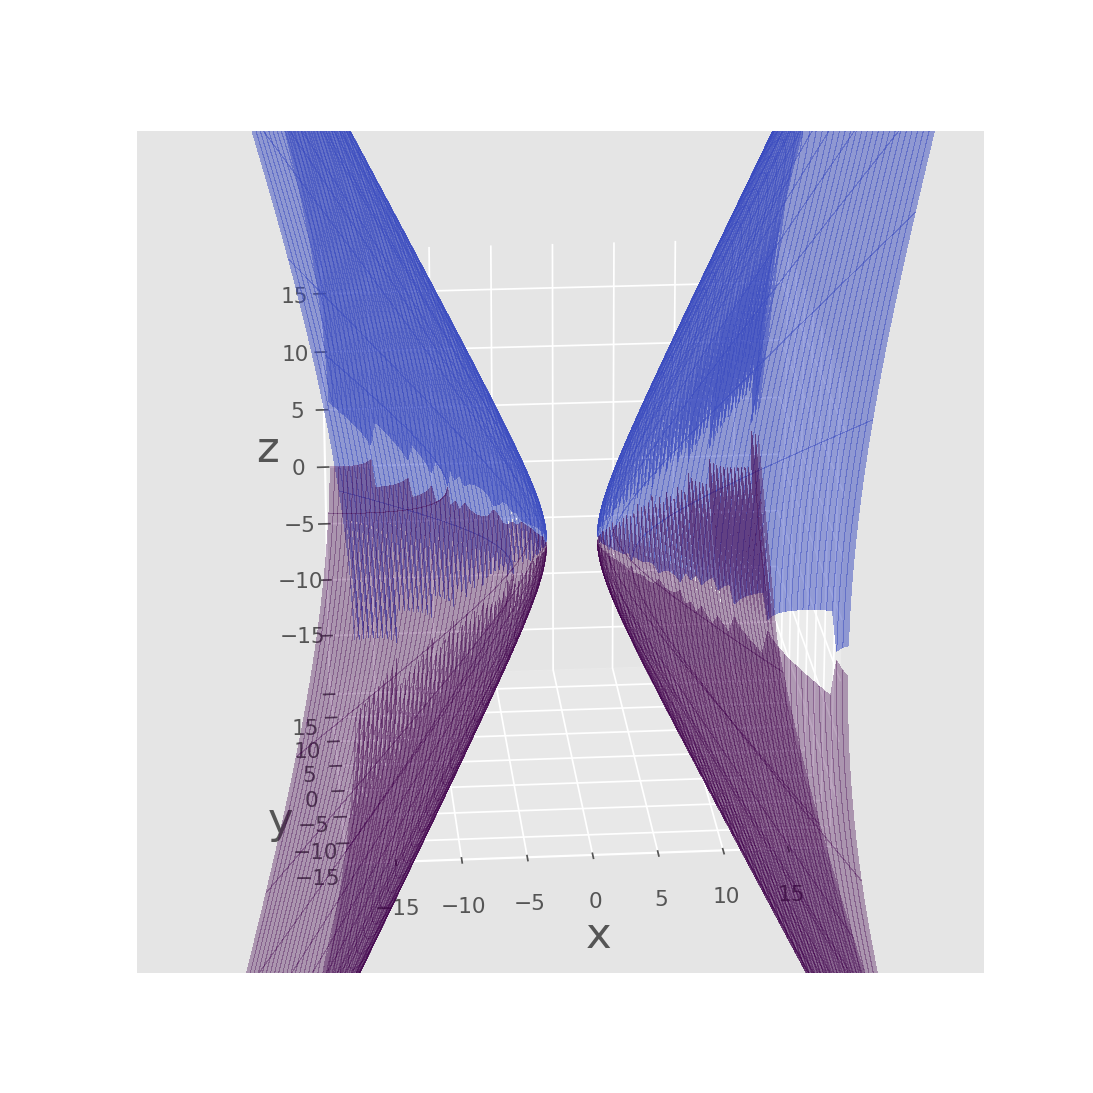

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [62]:
plot_cuadric(1/4,-1/9,-1/16, 0,0,0, 1,8)

### 12.- $z^2-4x^2-9y^2=36$

<IPython.core.display.Javascript object>


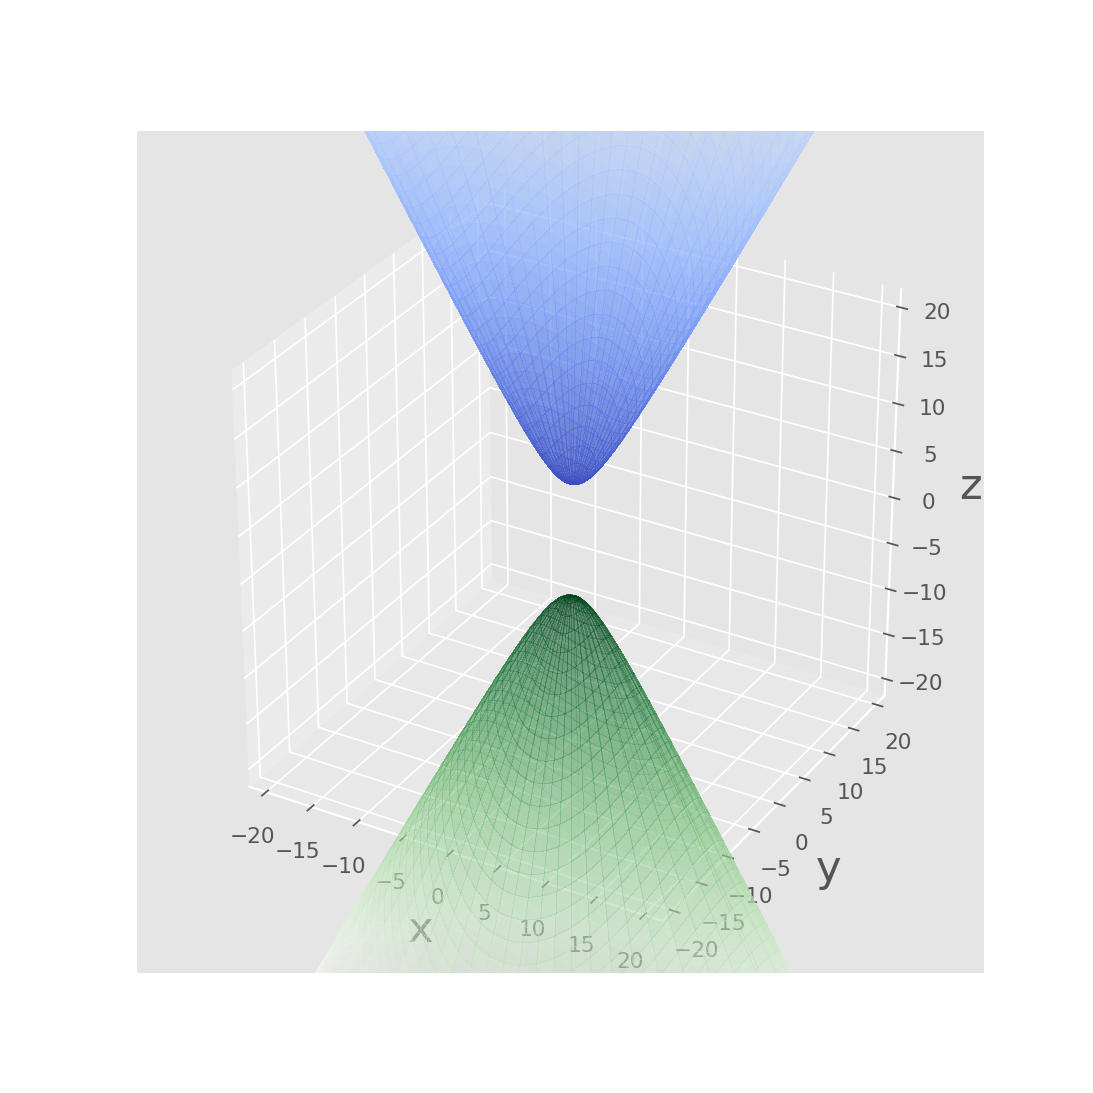

21.0


In [44]:
plot_cuadric(-4,-9,1, 0,0,0, 36,6)

### 13.- $\dfrac{x^2}{4}+\dfrac{y^2}{9}=z$

<IPython.core.display.Javascript object>


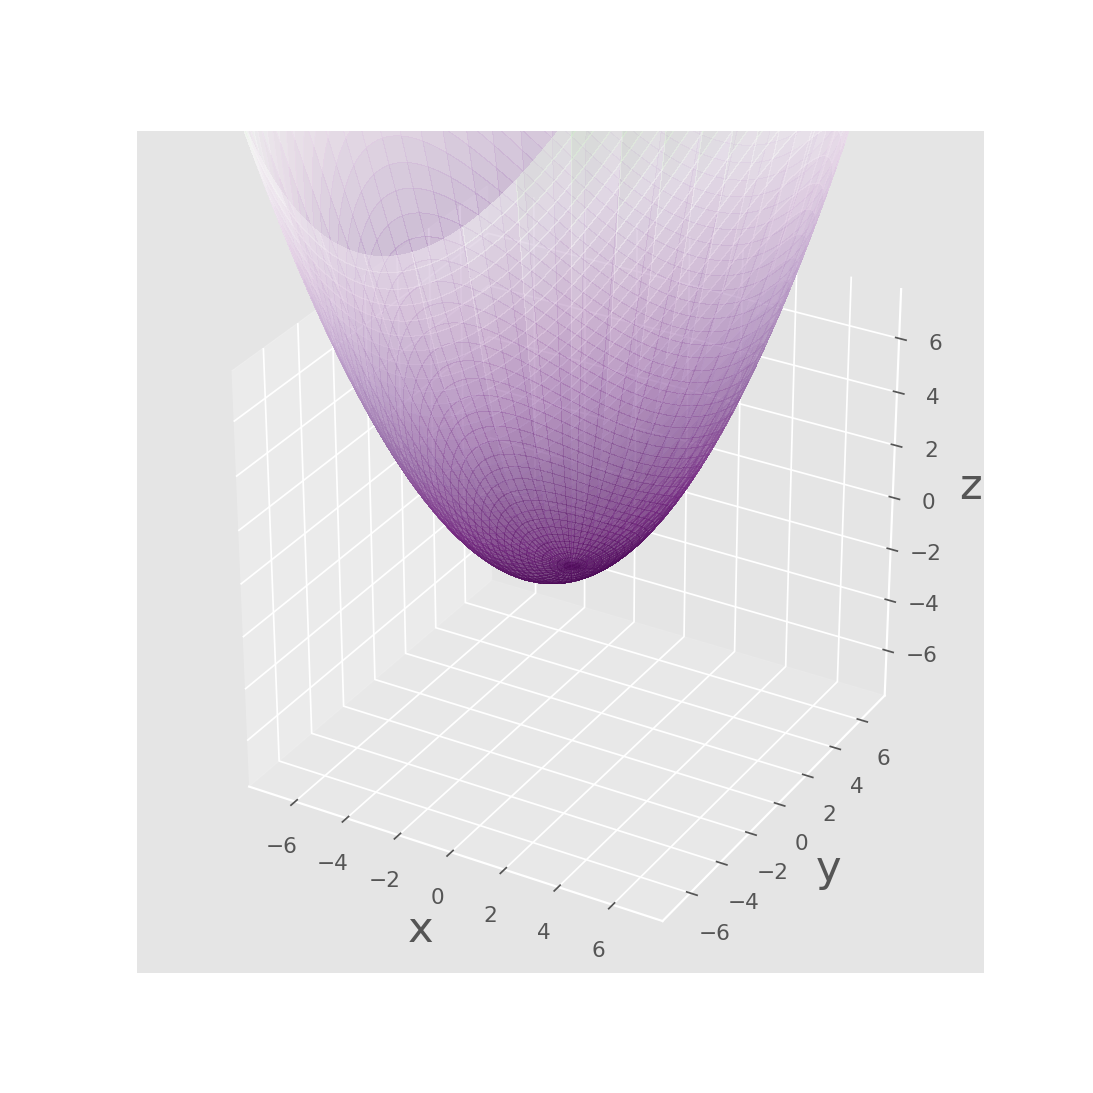

In [56]:
plot_cuadric(1/4,1/9,-1, 0,0,0, rads,extend=4, z_linear=True)

### 14.- $x^2+y^2+z+4=0$

<IPython.core.display.Javascript object>


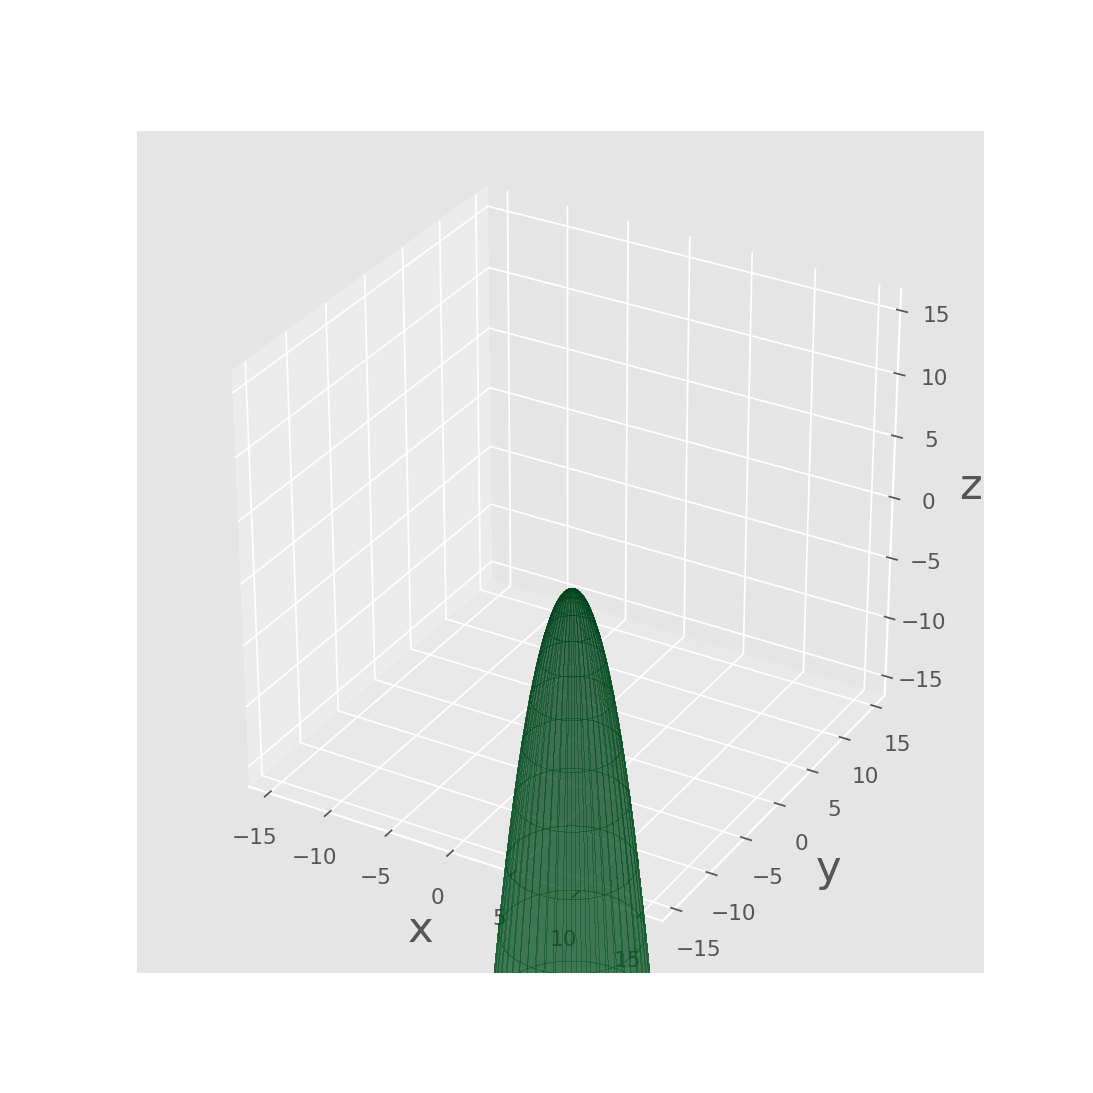

In [58]:
plot_cuadric(-1,-1,-1, 0,0,0, 4, 15,z_linear=True)

### 15.- $9x^2+9y^2=z^2$

<IPython.core.display.Javascript object>


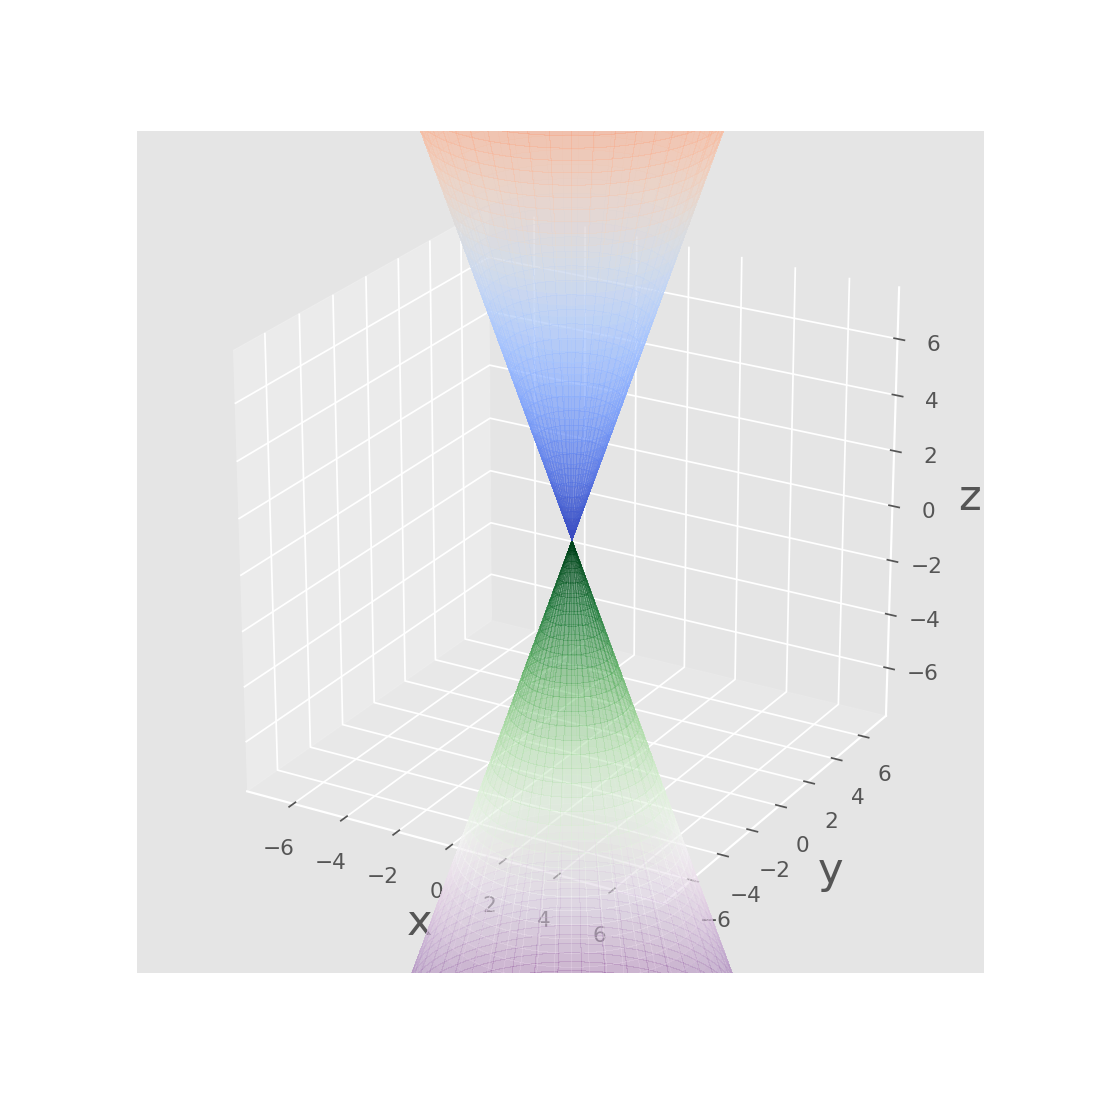

In [59]:
plot_cuadric(-9,-9,1, 0,0,0, 0,15)

### 16.- $4x^2+9y^2=z^2$ 

<IPython.core.display.Javascript object>


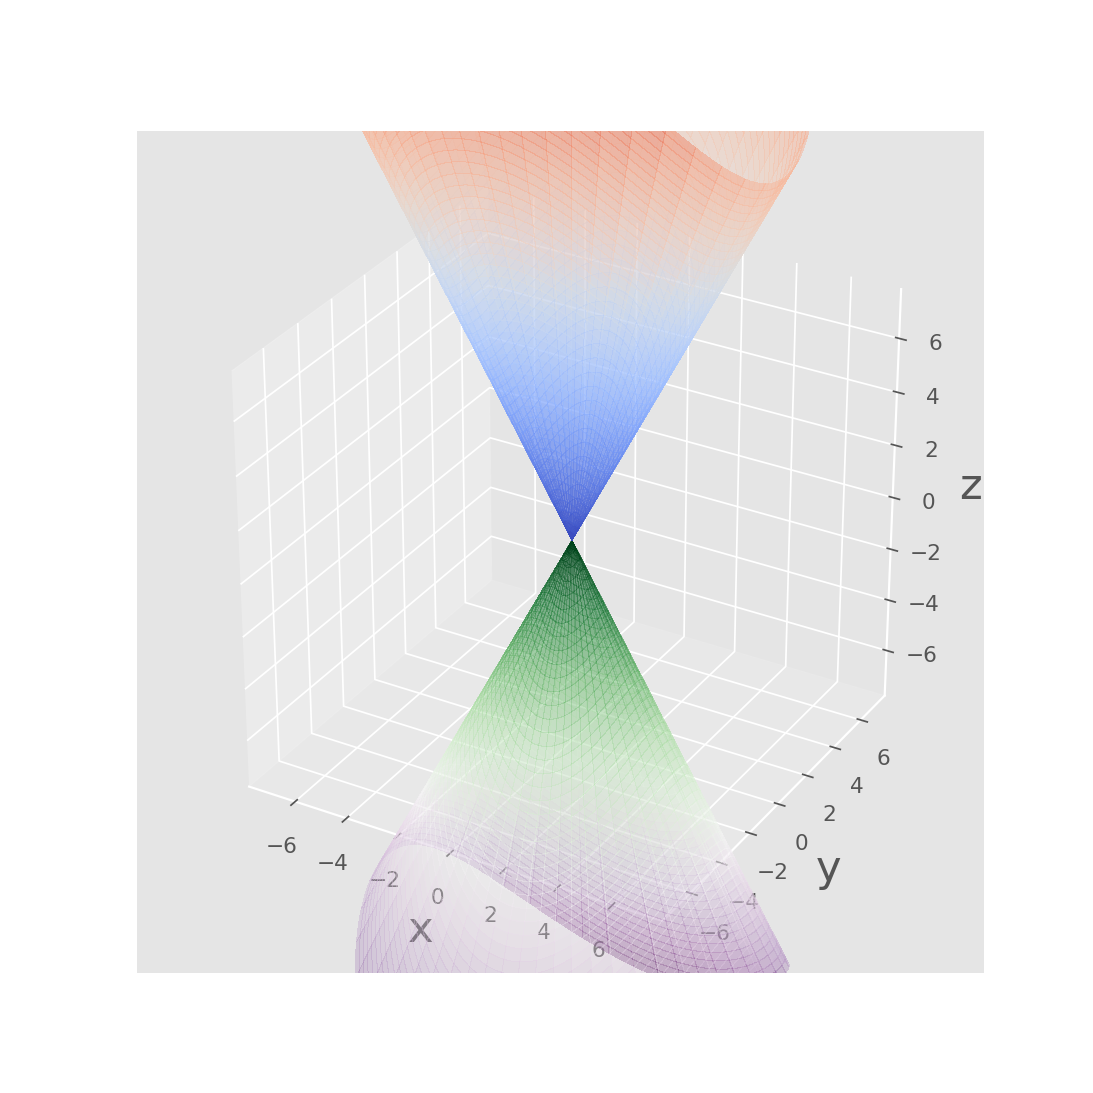

In [61]:
plot_cuadric(4,9,-1, 0,0,0, 0,15)

## En los ejercicios 17 a 20 esboce cada superficie cuádrica después de completar cuadrados y trasladar los ejes.

### 17.- $x^2+2y^2-2x-8y-3z+9=0$
\begin{align*}
x^2-2x+2y^2-8y-3z=-9
\\
x^2-2x+1-1+2y^2-8y+8-8-3z=-9
\\
(x-1)^2-1+2(y-2)^2-8-3z=-9
\\
(x-1)^2+2(y-2)^2-3z=0
\end{align*}

<IPython.core.display.Javascript object>


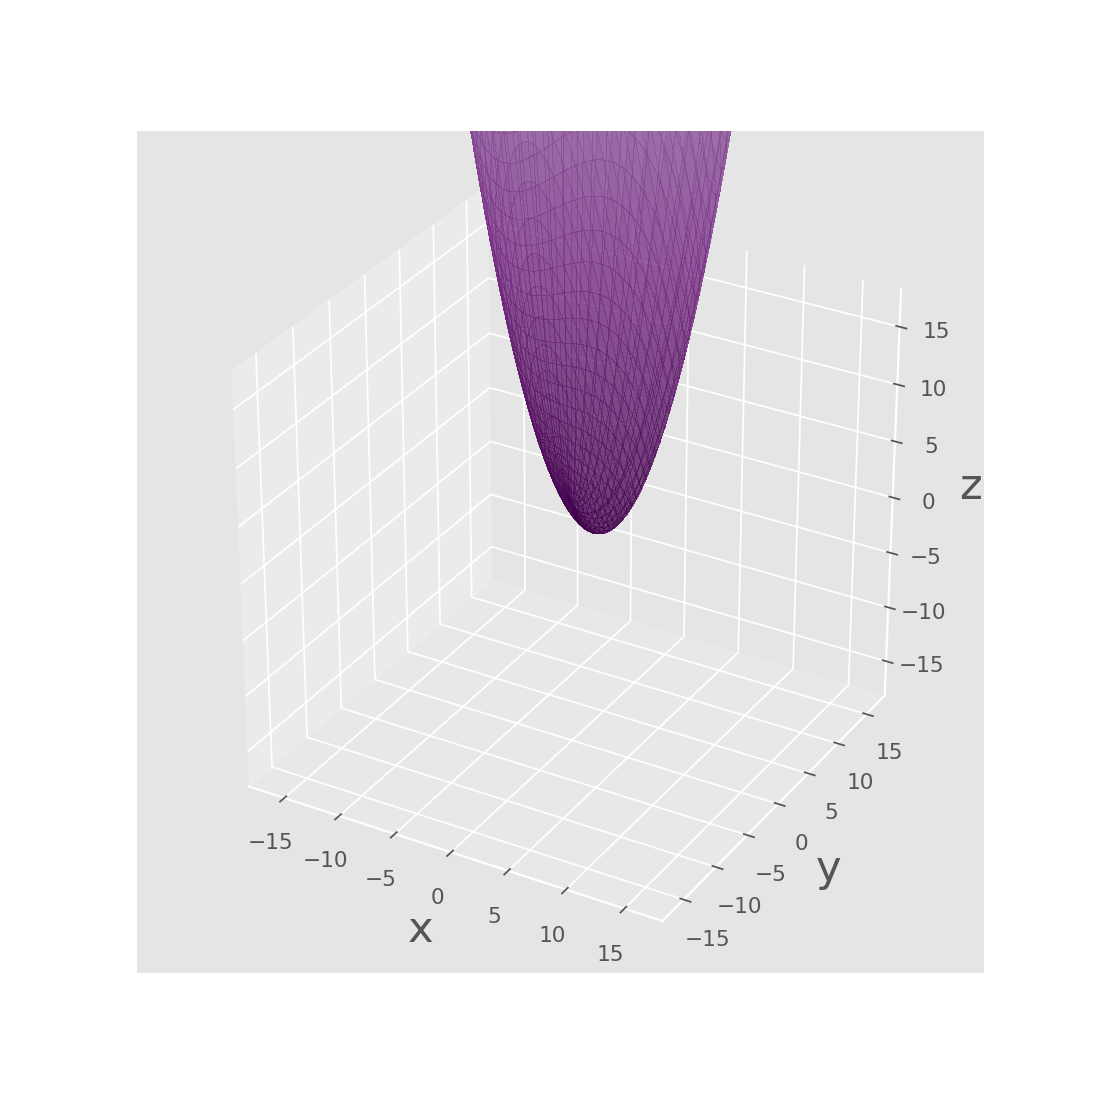

In [68]:
plot_cuadric(1,2,-3, 1,2,0, 0,35,z_linear=True)

### 18.- $9x^2+16y^2-36z^2-18x+72z=171$

\begin{align*}
9x^2-18x+16y^2-36z^2+72z=171
\\
9x^2-18x+9-9+16y^2-36z^2+72z-36+36=171
\\
9(x-1)^2-9+16y^2-36(z-1)^2+36=171
\\
9(x-1)^2+16y^2-36(z-1)^2=144
\end{align*}

<IPython.core.display.Javascript object>


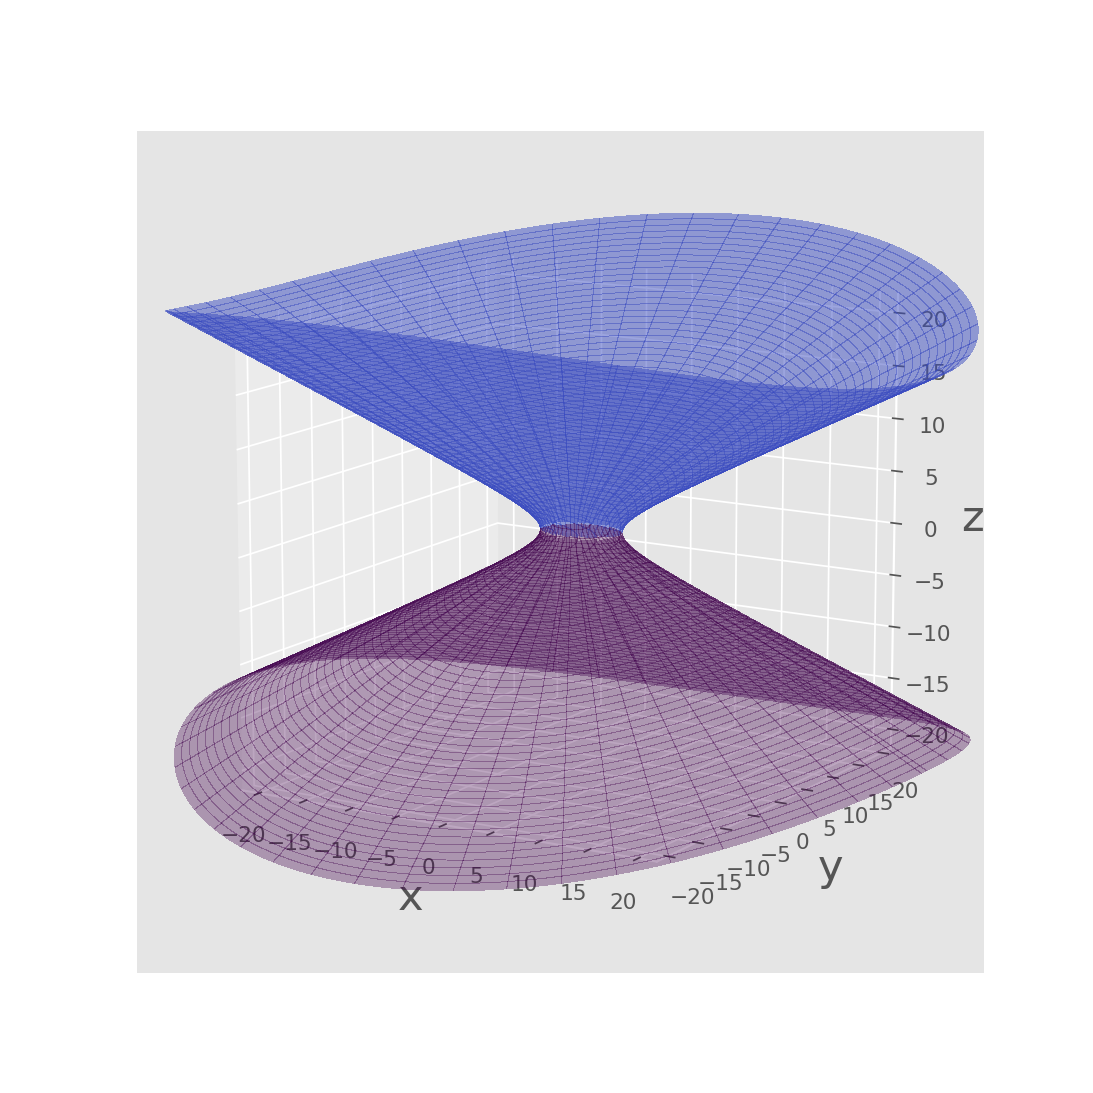

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [71]:
plot_cuadric(9,16,-36, 1,0,1, 144,9,z_linear=False)

### 19.- $4x^2+4y^2+z^2-16x-8y-6z+25=0$
\begin{align*}
4x^2-16x+4y^2-8y+z^2-6z+25=0
\\
4x^2-16x+16-16+4y^2-8y+4-4+z^2-6z+9-9+25=0
\\
4(x-2)^2-16+4(y-1)^2-4+(z-3)^2-9+25=0
\\
4(x-2)^2+4(y-1)^2+(z-3)^2=4
\end{align*}

<IPython.core.display.Javascript object>


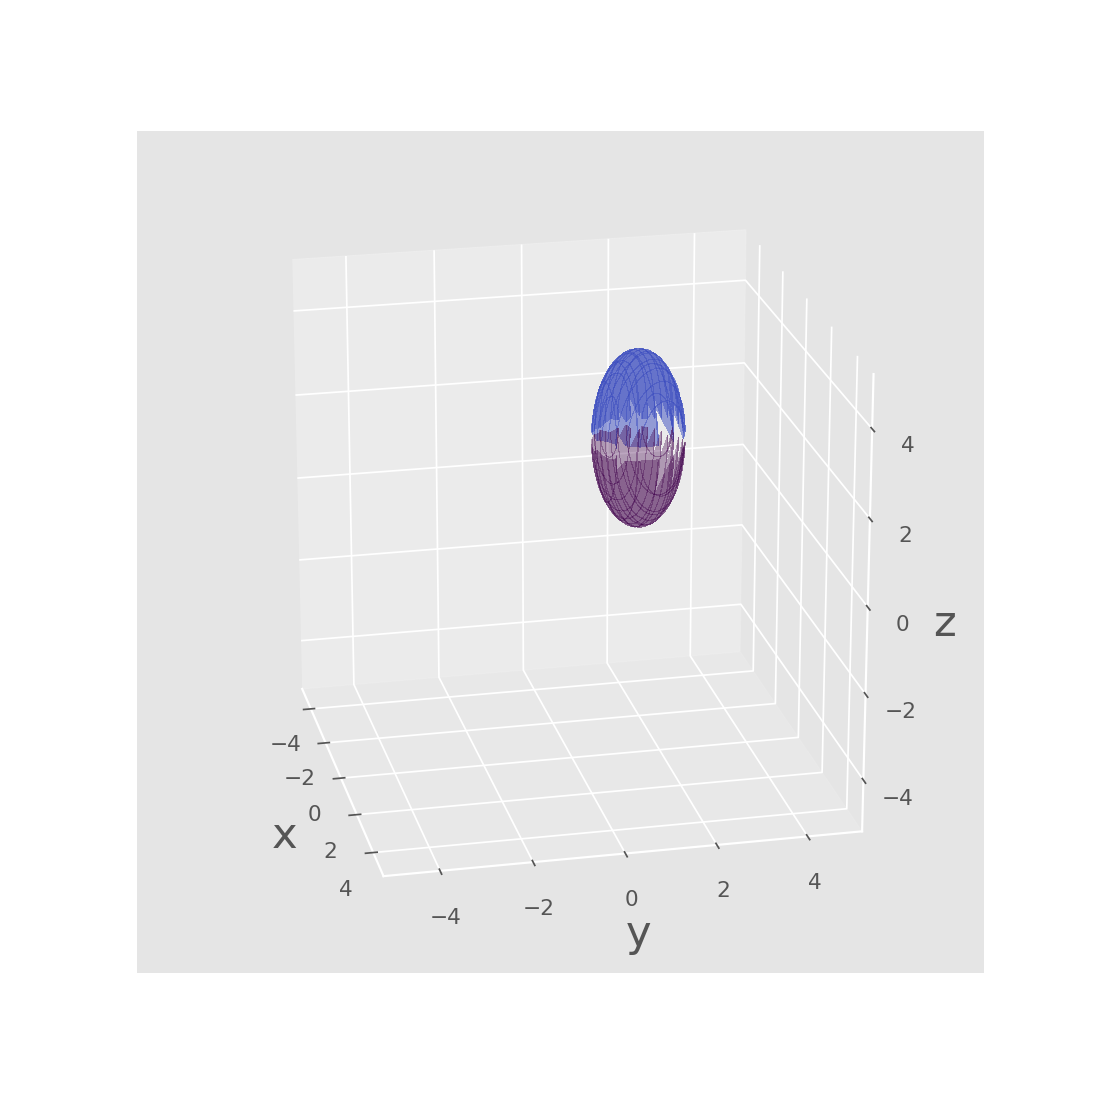

c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.
c:\users\hp-ome~1\docume~1\virtua~1\base\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [73]:
plot_cuadric(4,4,1, 2,1,3, 4,1,z_linear=False)

### 20.- $x^2+y^2-z^2-2x+2y+2=0$
\begin{align*}
x^2-2x+y^2+2y-z^2+2=0
\\
(x-1)^2-1+(y+1)^2-1-z^2+2=0
\\
(x-1)^2+(y+1)^2-z^2=0
\end{align*}

<IPython.core.display.Javascript object>


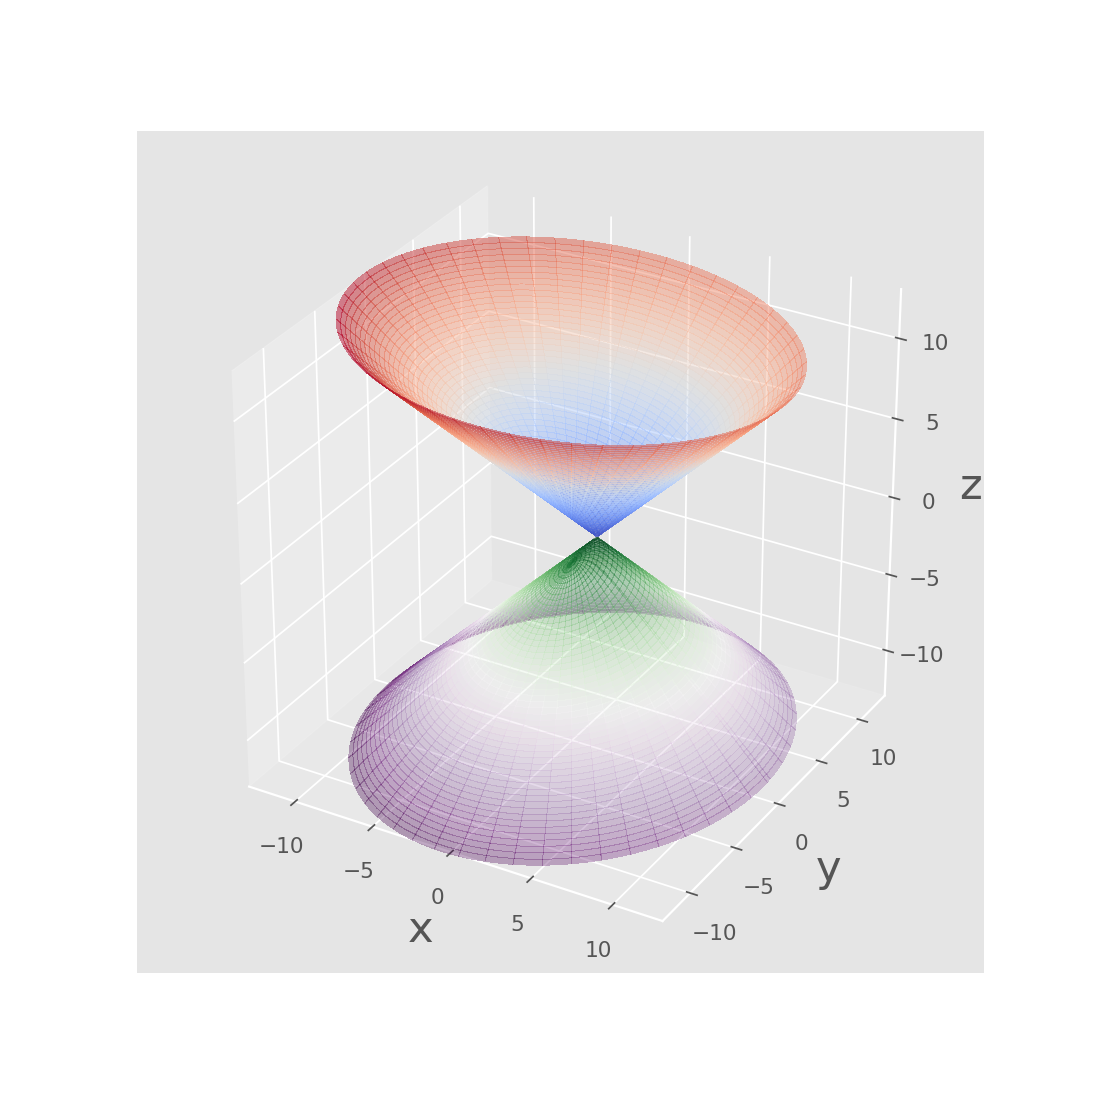

In [76]:
plot_cuadric(1,1,-1, 1,1,0, 0,25,z_linear=False)